# Customers using Bank

## 1. 데이터 확인


데이터를 보기 위해선 데이터를 불러오고, **'데이터 백업'**을 무조건 수행해 주어야 한다.
백업 후 실행해준 모습.

총 357개의 행이 있음을 확인하였다.

In [114]:
import pandas as pd

origin_data = '2021_빅데이터_데이터.csv'

df_1 = pd.read_csv(origin_data,encoding='cp949')

df_1.to_csv('backup_data.csv')

backupdata_path='backup_data.csv'

df_5 = pd.read_csv(backupdata_path)

df_5

,Unnamed: 0,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,0,111982034,1,1,0.0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,1,112444515,2,1,1.0,0.0,618.0,37.0,5,16.0,3.0,6,1
2,2,112690708,0,1,0.0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,3,114084953,1,1,0.0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,4,115345050,1,1,1.0,336.0,807.0,41.0,41,22.0,10.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,888150703,1,1,1.0,328.0,789.0,68.0,4,19.0,10.0,11,0
353,353,892321790,1,1,1.0,595.0,505.0,45.0,6,16.0,17.0,5,1
354,354,894428804,2,1,1.0,182.0,437.0,34.0,3,16.0,1.0,5,1
355,355,896471465,1,1,0.0,196.0,471.0,28.0,3,16.0,2.0,5,0


In [115]:
df_5.dtypes

Unnamed: 0      int64
고객번호            int64
결혼상태            int64
신용카드            int64
주택소유          float64
집세            float64
수입            float64
연령            float64
거주년수            int64
교육년수          float64
고객년수          float64
근무년수            int64
신용도             int64
dtype: object

## 2. 데이터 클린징

데이터 분석 **즉, EDA**를 하기 위해선,
1. 데이터셋을 확인
2. 결측값 처리
3. 이상치 처리

를 해주어야 한다. 먼저 데이터셋을 위에서 확인했으니, 결측치가 얼마나 있는지 확인한다.


아래 의 실행 결과로 사용총액,기본요금,부가요금,사용일수에 각각 몇개의 결측값이 있는지 확인하였다.

In [116]:
df_1.isnull().sum()

고객번호     0
결혼상태     0
신용카드     0
주택소유    13
집세      29
수입      34
연령      28
거주년수     0
교육년수    23
고객년수     9
근무년수     0
신용도      0
dtype: int64

### 결측 처리 방법은 총 3단계로 이루어진다. 
1. 결측치 확인
2. 결측치 대체/제거
3. 결측치 반영 확인 ( 데이터 변경 작업이므로 꼭 반영 여부를 확인해 줘야함)

위에서 결측치를 확인한 후 **'결측치를 대체 할 것인지'**, **'제거 할 것인지'** 정해야 하는데,

데이터셋을 보았을때, **'357'**명의 정보가 있는것을 확인했고, 결측치가 있는 행의 최대값이 **'136'**개 이기 때문에 

결측값이 있는 곳에 **해당 열의 평균값**으로 **'대체'**하고 진행하고자 한다.


In [117]:
missing_replace = df_1.fillna(df_1.mean())
missing_replace

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,111982034,1,1,0.0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,112444515,2,1,1.0,0.0,618.0,37.0,5,16.0,3.0,6,1
2,112690708,0,1,0.0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,114084953,1,1,0.0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,115345050,1,1,1.0,336.0,807.0,41.0,41,22.0,10.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
352,888150703,1,1,1.0,328.0,789.0,68.0,4,19.0,10.0,11,0
353,892321790,1,1,1.0,595.0,505.0,45.0,6,16.0,17.0,5,1
354,894428804,2,1,1.0,182.0,437.0,34.0,3,16.0,1.0,5,1
355,896471465,1,1,0.0,196.0,471.0,28.0,3,16.0,2.0,5,0


행을 삭제하고, 총 3188개의 행으로 준것을 확인하였고, 마지막으로 행이 완벽하게 삭제되었는지 한번 더 결측값을 확인해본다. 아래의 결과로 결측값이 있는 행은 다 지워진것을 확인하였다.

In [118]:
missing_replace.isnull().sum()

고객번호    0
결혼상태    0
신용카드    0
주택소유    0
집세      0
수입      0
연령      0
거주년수    0
교육년수    0
고객년수    0
근무년수    0
신용도     0
dtype: int64

결측값을 제거 후 클린징의 다음단계로 이상치를 제거해야 한다.

우선 고객번호가 있는 열은 값들이 너무 커서 박스플롯을 이용해 분석 할 경우 다른 열의 이상치를 시각적으로 잘 인지할 수 없기때문에 고객번호 열을 제외하고 시각화 해보았다.

**박스플롯을 이용해 데이터를 확인해 봤을때, 특별히 음수 값도 없고, 집세에서 가장 높은 가격(2473)을 차지한 사람은 신용도가 양호한 것으로 보아, 이상치로 판단하지 않고 그대로 진행하였다.**

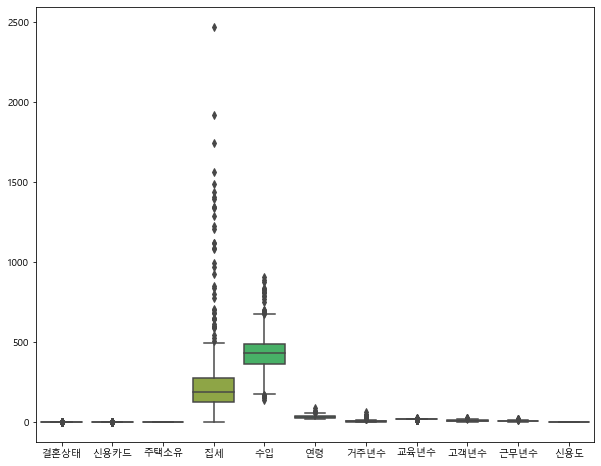

In [125]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_show = missing_replace.iloc[0:,1:] #고객번호 제외한 나머지 데이터셋 시각화를 위한 작업

plt.rc('font', family='Malgun Gothic') ##폰트 지정
plt.rc('axes', unicode_minus=False) ##음수 표현
graph = sns.boxplot(data = df_show) 
graph.figure.set_size_inches(10, 8)

### describe 함수로 결측치,이상치 제거를 다 완료한 것을 확인한다.

모든 열 count 357 동일, **mean값과 50%값이 거의 비슷한 것으로 보아** 마지막 확인 작업을 끝내도록 한다.

In [128]:
missing_replace.describe()

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000
mean,5.014296e+08,0.941176,0.896359,0.267442,273.000000,432.507740,32.489362,7.733894,16.00000,6.545977,5.229692,0.557423
std,2.339810e+08,0.589622,0.305223,0.435101,324.083132,138.217756,10.300024,10.835558,2.07581,4.462158,3.653982,0.757125
min,1.119820e+08,0.000000,0.000000,0.000000,0.000000,138.000000,18.000000,0.000000,12.00000,0.000000,0.000000,0.000000
25%,2.990977e+08,1.000000,1.000000,0.000000,122.000000,360.000000,25.000000,2.000000,16.00000,3.000000,3.000000,0.000000
50%,4.782825e+08,1.000000,1.000000,0.000000,187.000000,429.000000,32.000000,3.000000,16.00000,6.000000,5.000000,0.000000
75%,7.180636e+08,1.000000,1.000000,1.000000,273.000000,485.000000,38.000000,6.000000,16.00000,9.000000,7.000000,1.000000
max,8.972570e+08,2.000000,1.000000,1.000000,2473.000000,906.000000,84.000000,64.000000,22.00000,26.000000,17.000000,2.000000


## 3. 데이터 탐색

데이터 탐색 과정에서 내가 무엇을 기준으로 잡고, 어떻게 하면 가장 좋은 분석 결과를 이끌어 낼 수 있을지 고민한다.

본인은 은행의 입장에서 대출 전화를 돌려 대출하는 사람의 수를 늘리고 싶은데,

대출권유를 할 사람을 어떤 기준으로 정해볼까? 라는 문제를 세웠다.

안정적으로 대출을 해줄 수 있는 기혼자이면서 신용도가 양호한 사람을 탐색해보기로 하였다. 

기혼자이면서 신용도가 양호한 사람은 대출을 받을 확률이 높다. 라는 가설을 세우고, 

맞는지 아닐지 판단하기 위해 우선적으로 타겟 데이터 수집을 하는 단계를 진행해 보도록 하자.

In [138]:
groupby_trust = missing_replace.groupby(['결혼상태','신용도'])

In [139]:
groupby_trust

결혼상태,신용도를 기준으로 그룹화를 해서 데이터 분석을 해보자 한다.

각 그룹의 소득이 먼저 궁금해서, 살펴 보았는데
아래 확인결과 이혼하고, 신용도가 양호한 그룹이 소득은 제일 높았다.

**그러나** 본인은 기혼상태이고, 신용도가 양호한 사람이 신뢰도가 더 높다고 생각하여 
기혼고,신용도가 양호한 사람들을 따로 필터링 해서 보기 쉽게 데이터 프레임으로 나타내겠다.

In [140]:
df2 = groupby_trust.mean()

In [141]:
df2['수입']

결혼상태  신용도
0     0      427.083333
      1      332.545455
      2      290.405335
1     0      492.833265
      1      367.145910
      2      366.732419
2     0      501.643963
      1      394.049158
      2      311.003870
Name: 수입, dtype: float64

보기쉽게 피봇테이블을 이용해서 살펴 보았다. 

인덱스를 결혼상태, 열을 신용도, 값을 수입으로 지정하였다.

In [142]:
pd.pivot_table(missing_replace,index='결혼상태',columns='신용도',values='수입')

신용도,0,1,2
결혼상태,,,
0,427.083333,332.545455,290.405335
1,492.833265,367.145910,366.732419
2,501.643963,394.049158,311.003870


그 다음으로 대출권유 목적으로 전화해야할 사람들의 목록을 쭉 데이터프레임으로 뽑아보았다.

### 총 173명이 존재하고, 모두 기혼이며, 신용도가 양호한 것을 확인 할 수 있다. 
### **수입이 많은 사람부터 볼 수 있도록 내림차순으로 정렬하였다.**

In [144]:
con1 = (missing_replace['결혼상태'] == 1)
con2 = (missing_replace['신용도'] == 0)

missing_replace[con1 & con2].sort_values(by='수입',ascending=False)

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
349,881811707,1,0,0.0,377.0,906.0,45.000000,2,16.0,10.0,8,0
274,726187269,1,1,0.0,273.0,888.0,48.000000,3,16.0,5.0,12,0
143,410593006,1,0,0.0,365.0,877.0,59.000000,6,20.0,7.0,6,0
296,775179809,1,1,0.0,349.0,838.0,84.000000,64,19.0,2.0,9,0
220,603818413,1,0,0.0,347.0,834.0,44.000000,2,20.0,8.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,319630396,1,1,0.0,126.0,304.0,24.000000,5,16.0,13.0,1,0
346,879522287,1,1,0.0,122.0,294.0,32.489362,4,16.0,3.0,2,0
276,736292966,1,1,0.0,273.0,276.0,32.000000,2,16.0,4.0,5,0
149,419418563,1,1,1.0,112.0,269.0,28.000000,28,16.0,5.0,5,0


## 4.데이터 분석

데이터가 범주형인지, 연속형인지 미리 앞에서도 확인을 해주었지만, 순서상 한번 더 진행하고 확인해 주었다.

보게되면 범주형은 없고, 모두 int,float 정수,실수 연속형으로 이루어져 있다. dtypes를 보아 float형 6개, int형 6개가 있다.

In [130]:
missing_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    357 non-null    int64  
 1   결혼상태    357 non-null    int64  
 2   신용카드    357 non-null    int64  
 3   주택소유    357 non-null    float64
 4   집세      357 non-null    float64
 5   수입      357 non-null    float64
 6   연령      357 non-null    float64
 7   거주년수    357 non-null    int64  
 8   교육년수    357 non-null    float64
 9   고객년수    357 non-null    float64
 10  근무년수    357 non-null    int64  
 11  신용도     357 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 33.6 KB


dtypes을 통해 한번 더 확인해주었다.

In [147]:
missing_replace.dtypes

고객번호      int64
결혼상태      int64
신용카드      int64
주택소유    float64
집세      float64
수입      float64
연령      float64
거주년수      int64
교육년수    float64
고객년수    float64
근무년수      int64
신용도       int64
dtype: object

상위 5개의 행만 추출하여 연속형인지 다시한번 데이터들을 확인한다.

In [131]:
missing_replace.head()

,고객번호,결혼상태,신용카드,주택소유,집세,수입,연령,거주년수,교육년수,고객년수,근무년수,신용도
0,111982034,1,1,0.0,147.0,353.0,28.0,2,16.0,5.0,5,0
1,112444515,2,1,1.0,0.0,618.0,37.0,5,16.0,3.0,6,1
2,112690708,0,1,0.0,146.0,352.0,21.0,1,19.0,7.0,2,1
3,114084953,1,1,0.0,250.0,600.0,50.0,2,16.0,8.0,9,0
4,115345050,1,1,1.0,336.0,807.0,41.0,41,22.0,10.0,10,0


## 5. 본인만의 차별화 분석 포인트

실무적으로 들어가서 내가 만약 데이터 분석가로 취업하게 되어

일을 받게 된다면, 회사에 도움이 될만한 데이터를 분석해야 하지 않을까?라고  생각했다.

때문에 데이터를 보자마자, 여러가지 columns를 깊게 살펴보고, 이해하면서 Busniss model과 관련된 수익증진을 생각해 보다가,

은행사의 '대출권유'가 생각났고, 이를 기반으로 진행하게 되었다. 정말 간단하게 분석만 해보는 것이지만, 은행사에서 

이 데이터를 기반으로 할 수 있는 분석중 좋은 분석이라고 생각해 보았다. 

데이터분석은 실존하는 데이터로, 확실치 않은 가설을 보다 현실적으로 검증할 수 있다는 점이 정말 흥미로운 것 같다.:)
